<a href="https://colab.research.google.com/github/parkjh21c/ML-DL/blob/main/smarthon_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/smarthon/data.xlsx')

df['일자'] = pd.to_datetime(df['일자'])

# 데이터 순서 뒤집고 인덱스 다시 정의
df = df.sort_index(ascending=False)
df = df.reset_index(drop=True)
df = df.set_index('일자')

df

,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수,...,선행 PER,BPS,PBR,주당배당금,배당수익률,외국인 보유수량,외국인 지분율,외국인 한도수량,외국인 한도소진율,등락
일자,,,,,,,,,,,,,,,,,,,,,
2023-01-02,76138,0,0.00,76552,78621,75000,691041,51302865100,3726370000000,50630000,...,12.75,57134,1.29,700,0.95,12069472,23.84,50630000,23.84,0
2023-01-03,73862,-2276,-2.99,76138,76966,72414,851220,60766095500,3614980000000,50630000,...,12.11,57134,1.25,700,0.98,11960663,23.62,50630000,23.62,-1
2023-01-04,74276,414,0.56,74069,74586,71586,555372,39384977200,3635230000000,50630000,...,12.18,57134,1.26,700,0.97,11991757,23.69,50630000,23.69,1
2023-01-05,69103,-5173,-6.96,74379,74897,67862,1516452,103072000000,3382080000000,50630000,...,10.95,57134,1.17,700,1.05,12008255,23.72,50630000,23.72,-1
2023-01-06,69310,207,0.30,68276,70552,68069,528494,35514686400,3392210000000,50630000,...,10.99,57134,1.17,700,1.04,11674802,23.06,50630000,23.06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,326000,21000,6.89,306500,328500,306500,336668,107690000000,14859500000000,45581161,...,15.65,69773,4.67,1800,0.55,19749349,43.33,45581161,43.33,1
2024-12-24,324000,-2000,-0.61,329000,330000,320500,179574,58184245500,14768300000000,45581161,...,15.56,69773,4.64,1800,0.56,19822787,43.49,45581161,43.49,-1
2024-12-26,323500,-500,-0.15,324000,327000,316500,186277,60108541000,14745500000000,45581161,...,15.53,69773,4.64,1800,0.56,19778192,43.39,45581161,43.39,-1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 489 entries, 2023-01-02 to 2024-12-30
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   종가         489 non-null    int64  
 1   대비         489 non-null    int64  
 2   등락률        489 non-null    float64
 3   시가         489 non-null    int64  
 4   고가         489 non-null    int64  
 5   저가         489 non-null    int64  
 6   거래량        489 non-null    int64  
 7   거래대금       489 non-null    int64  
 8   시가총액       489 non-null    int64  
 9   상장주식수      489 non-null    int64  
 10  EPS        489 non-null    int64  
 11  PER        489 non-null    float64
 12  선행 EPS     489 non-null    int64  
 13  선행 PER     489 non-null    float64
 14  BPS        489 non-null    int64  
 15  PBR        489 non-null    float64
 16  주당배당금      489 non-null    int64  
 17  배당수익률      489 non-null    float64
 18  외국인 보유수량   489 non-null    int64  
 19  외국인 지분율    489 non-null    floa

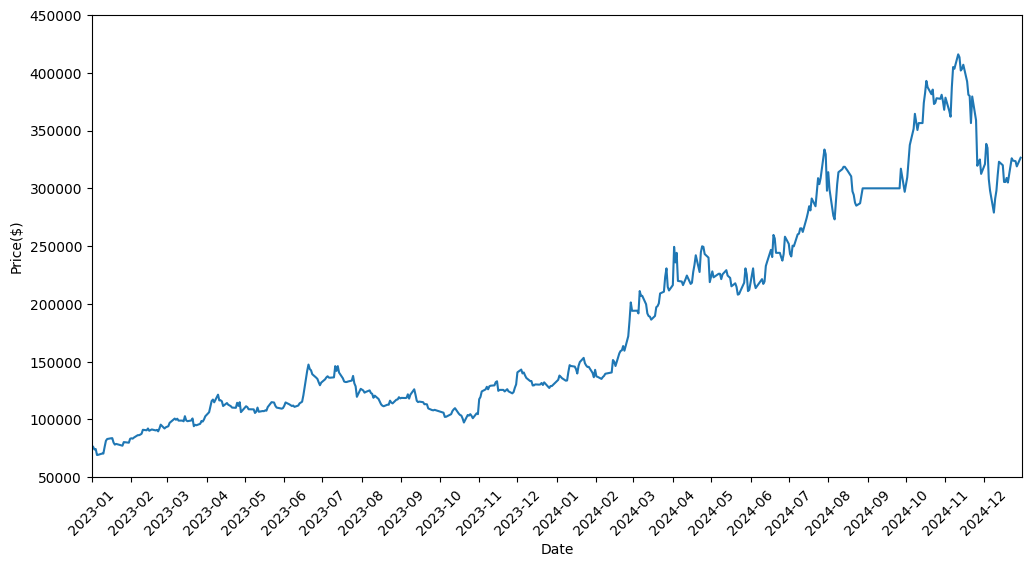

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


plt.figure(figsize=(12,6))
plt.plot(df.index, df['종가'])

plt.xlabel('Date')
plt.ylabel('Price($)')

# x축 범위 설정
plt.xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2024-12-31'))

# x축 눈금 설정
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# x축 레이블 회전
plt.xticks(rotation=45)

plt.yticks([50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000])

plt.show()

LSTM + 랜덤포레스트

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

target_column = df.columns[-1]

X = df.drop(target_column, axis=1)
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
from tensorflow.keras.utils import to_categorical

# y값을 0, 1, 2로 변환 후 원-핫 인코딩
y_transformed = (y + 1)  # -1, 0, 1 → 0, 1, 2
y_one_hot = to_categorical(y_transformed, num_classes=3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# 데이터 스케일링 및 랜덤 포레스트 학습
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y_transformed)

# 중요한 피처 선택
important_features = rf.feature_importances_
top_features_indices = important_features.argsort()[-10:]  # 상위 10개 피처
X_selected = X[:, top_features_indices]

InvalidIndexError: (slice(None, None, None), array([19,  8, 13,  6,  7,  5,  3,  4,  1,  2]))